In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis

from lifelines.plotting import plot_lifetimes


In [4]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)

In [5]:
data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]

In [7]:
data

,Observed,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,,,,,,
41C,True,2154137.0,0,2.104871,1.185236,1.002988,1.559453,0.893268,1.107898,0.462483,5.576476,190.979294,-0.137640,-2.866030,4.804749
44C,True,1318034.0,0,2.280959,1.365329,0.998446,1.504218,0.888503,1.140535,0.477160,4.619563,187.204261,-0.596385,-2.788500,3.370729
45C,False,3245267.0,0,1.245687,0.809970,0.989351,1.282046,0.896534,1.137561,0.491483,3.458337,189.010633,-0.645710,-3.202220,4.186639
19C,True,464392.0,450000,0.763296,1.128928,1.002407,1.126849,0.978877,1.235508,0.530102,3.798736,171.925123,-1.065155,-1.570740,3.226957
32C,True,306142.0,450000,0.610771,1.137713,0.994283,0.844962,0.844824,1.091099,0.459167,4.296261,169.717689,-0.617190,-1.312415,2.907922
23C,False,2255225.0,600000,0.397580,0.919473,0.999861,0.846653,0.918699,1.114762,0.495867,5.621833,173.403495,-0.831110,-1.194540,3.061743
25C,False,1444844.0,600000,0.821445,1.178319,1.003158,1.141313,0.881052,1.083718,0.477500,3.061693,172.727399,-0.912065,-0.927155,3.284087
21C,True,200007.0,600000,0.705402,1.151889,0.984968,0.853808,0.929446,1.119635,0.493245,4.626314,174.003954,-0.884900,-1.578795,2.764862
27C,True,297627.0,750000,0.144147,0.777585,1.002966,0.394731,0.912962,1.112708,0.500035,5.020607,173.688949,-1.276355,-1.602150,2.746634


In [2]:
actual_lifetimes

array([10.922288  ,  1.98728473,  3.6399262 , 14.16461986,  2.9674612 ,
       17.8905704 , 22.0694644 , 16.55569341,  3.40999389, 15.36652246,
        4.71942112,  0.34418772,  0.06957424,  0.73487527,  6.54006858,
        4.88437425,  9.3039229 ,  0.28060112,  1.47947516, 15.33364087,
        1.78804822, 27.93595117,  4.06589016,  1.65300509,  0.4911348 ])

Text(0.5, 1.0, 'Failure at $cycle=1e6$')

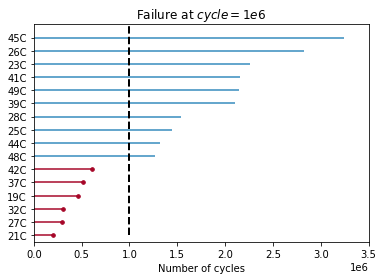

In [19]:
current_time = 1000000

observed_lifetimes = np.minimum(data['F_Time'], current_time)
death_observed = data['F_Time'] < current_time

ax = plot_lifetimes(data['F_Time'], event_observed=death_observed)

ax.set_xlim(0, 3500000)
ax.vlines(1000000, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("Number of cycles")
ax.set_title("Failure at $cycle=1e6$")

## Kaplan Meier

Text(0.5, 0, 'time $t$')

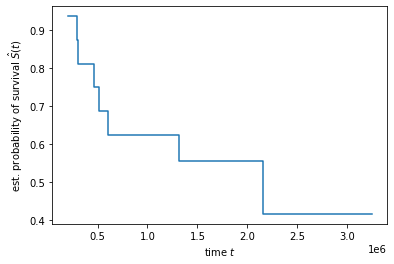

In [174]:
time, survival_prob = kaplan_meier_estimator(data_y["Observed"], data_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

## Kaplan Meier by 'age' i.e. cycle at NDE

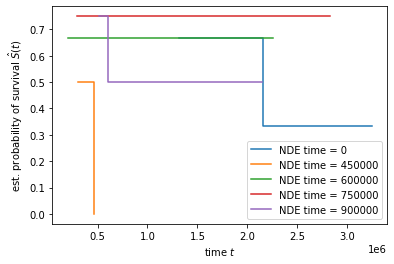

In [176]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_x["NDE_cycle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_y["Observed"][mask_treat],
        data_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

## Structured array for Cox

In [177]:
data_y_num = data_y.to_records(index=False)

## Cox survival analysis

In [178]:
estimator = CoxPHSurvivalAnalysis(alpha=0.0000001, verbose=2)
estimator.fit(data_x, data_y_num)

iter      1: loss = 0.2735597685
iter      2: loss = 0.1125178944
iter      3: loss = 0.0492022581
iter      4: loss = 0.0228681056
iter      5: loss = 0.3838228071
iter      4: loss increased, performing step-halving. loss = 0.0329107245
iter      6: loss = 0.0149345735
iter      7: loss = 0.0079678768
iter      8: loss = 0.0058380946
iter      9: loss = 0.0051705976
iter     10: loss = 0.0048391636
iter     11: loss = 0.0046300913
iter     12: loss = 0.0044254426
iter     13: loss = 11.0045282263
iter     12: loss increased, performing step-halving. loss = 0.0045029132
iter     14: loss = 0.5911439889
iter     13: loss increased, performing step-halving. loss = 0.0045593698
iter     15: loss = 0.0042865617
iter     16: loss = 0.0042254501
iter     17: loss = 0.0041896559
iter     18: loss = 0.0041810043
iter     19: loss = 0.0041798652
iter     20: loss = 0.0041798270
iter     21: loss = 0.0041798269
iter     22: loss = 0.0041798269
iter     22: optimization converged


/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=4.66688e-17): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=7.93774e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=3.88442e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=2.09751e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI

CoxPHSurvivalAnalysis(alpha=1e-07, verbose=2)